### IQR method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
data = sns.load_dataset('exercise')
data.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
data.shape

(90, 6)

In [5]:
data.drop(columns=['Unnamed: 0','id'],inplace=True)
data

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


In [6]:
data.isnull().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

In [7]:
data.rename(columns={'time':'time(min)'},inplace=True)
data

,diet,pulse,time(min),kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


In [8]:
data['time'] = data['time(min)'].str.replace('\D', '', regex=True)

In [9]:
data

,diet,pulse,time(min),kind,time
0,low fat,85,1 min,rest,1
1,low fat,85,15 min,rest,15
2,low fat,88,30 min,rest,30
3,low fat,90,1 min,rest,1
4,low fat,92,15 min,rest,15
...,...,...,...,...,...
85,no fat,135,15 min,running,15
86,no fat,130,30 min,running,30
87,no fat,99,1 min,running,1
88,no fat,111,15 min,running,15


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   diet       90 non-null     category
 1   pulse      90 non-null     int64   
 2   time(min)  90 non-null     category
 3   kind       90 non-null     category
 4   time       90 non-null     object  
dtypes: category(3), int64(1), object(1)
memory usage: 2.2+ KB


In [11]:
data.time = data.time.astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   diet       90 non-null     category
 1   pulse      90 non-null     int64   
 2   time(min)  90 non-null     category
 3   kind       90 non-null     category
 4   time       90 non-null     int32   
dtypes: category(3), int32(1), int64(1)
memory usage: 1.8 KB


In [14]:
data.drop(columns=['time(min)'],inplace=True)
data.rename(columns={'time':'time(min)'},inplace=True)
data

,diet,pulse,kind,time(min)
0,low fat,85,rest,1
1,low fat,85,rest,15
2,low fat,88,rest,30
3,low fat,90,rest,1
4,low fat,92,rest,15
...,...,...,...,...
85,no fat,135,running,15
86,no fat,130,running,30
87,no fat,99,running,1
88,no fat,111,running,15


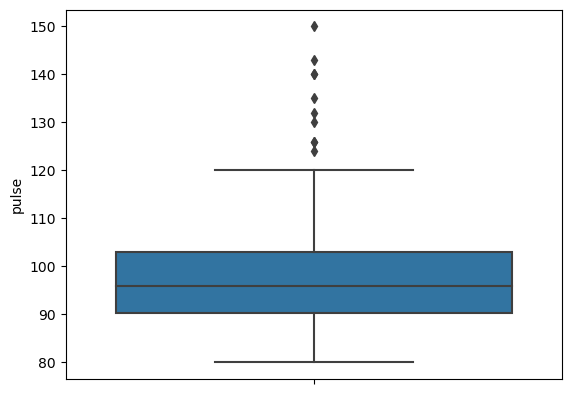

In [16]:
sns.boxplot(data=data,y='pulse')
plt.show()

#### setting the outer limiits

In [17]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL =Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [23]:
UL,LL = outlier_limit(data.pulse)
data['pulse'] = np.where((data.pulse>UL) | (data.pulse<LL),np.nan,data.pulse)

In [24]:
data.isnull().sum()

diet         0
pulse        2
kind         0
time(min)    0
dtype: int64

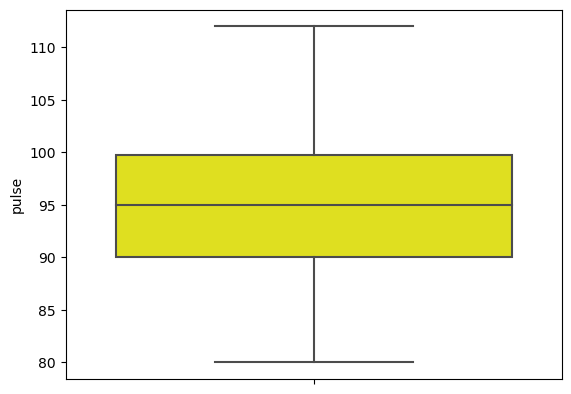

In [26]:
sns.boxplot(data=data,y='pulse',color='yellow');

In [22]:
data.dropna(inplace=True)
data

,diet,pulse,kind,time(min)
0,low fat,85.0,rest,1
1,low fat,85.0,rest,15
2,low fat,88.0,rest,30
3,low fat,90.0,rest,1
4,low fat,92.0,rest,15
...,...,...,...,...
78,no fat,100.0,running,1
81,no fat,103.0,running,1
84,no fat,94.0,running,1
87,no fat,99.0,running,1


In [29]:
g_data = sns.load_dataset('geyser')
g_data

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [30]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [31]:
h_data = sns.load_dataset('mpg')
h_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [32]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [33]:
h_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

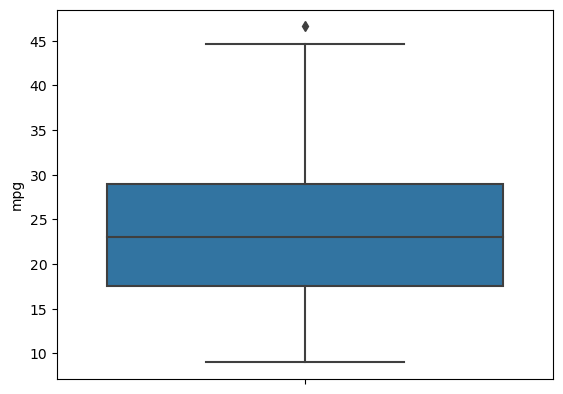

In [34]:
sns.boxplot(data=h_data,y='mpg');

In [35]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL =Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [36]:
UL,LL = outlier_limit(h_data.mpg)
h_data['mpg'] = np.where((h_data.mpg>UL) | (h_data.mpg<LL),np.nan,h_data.mpg)

In [37]:
h_data.isnull().sum()

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

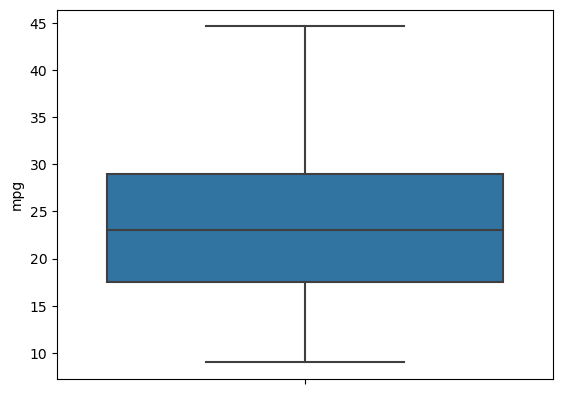

In [38]:
sns.boxplot(data=h_data,y='mpg');

In [42]:
box_columns = ['mpg','displacement','horsepower','weight','acceleration']

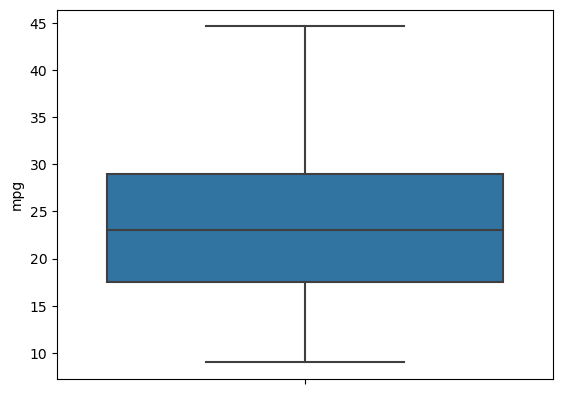

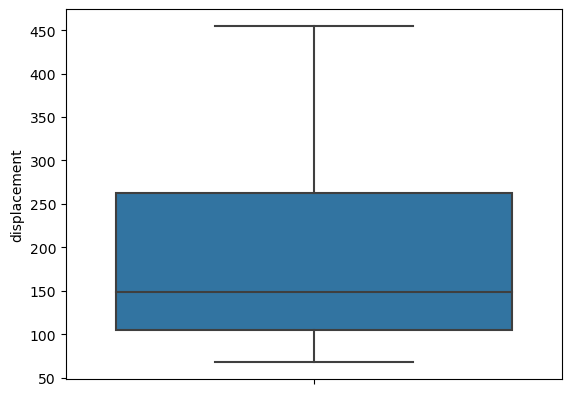

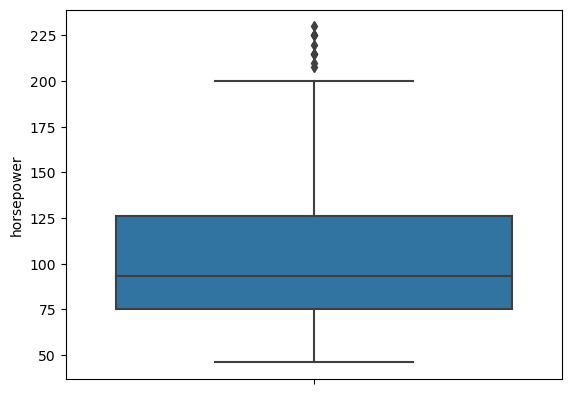

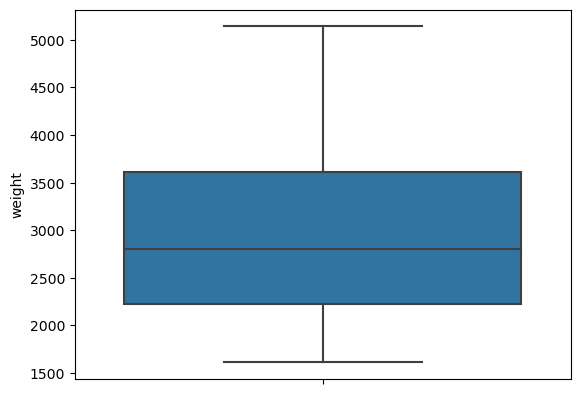

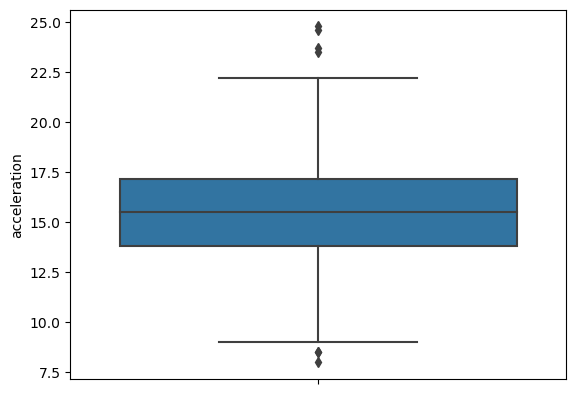

In [43]:
for i in box_columns:
    sns.boxplot(data=h_data,y=h_data[i])
    plt.show()

In [ ]:
UL,LL = outlier_limit(h_data.acceleration)